In [2]:
import scipy.io
import numpy as np
import os
import math
import random
import scipy.stats as sci
import matplotlib.pyplot as plt

In [3]:
#Problem 4
#Preprocess data
from sklearn import preprocessing
os.chdir('/Users/Michael/Desktop/Spring2017/CS289/HW4')
data = scipy.io.loadmat('data.mat')
X_scaled = preprocessing.normalize(data["X"], axis=0)
data_full = np.asarray([np.append(X_scaled[i], data["y"][i][0]) for i in range(6000)])

#Partition training and valiation set
np.random.shuffle(data_full)
k = 4800
training_full = data_full[0:k,:]
validation_full = data_full[k:,:]

#Normalize test features
test_data = preprocessing.normalize(data["X_test"], axis=0)

In [346]:
#Cross validation to choose the optimal lambda for l
l_range = [0.0001,0.001,0.01,0.1,1]
alpha = 0.5
final_cost = list(range(0))

for l in l_range:
    cost = list(range(0))
    weight = np.zeros((10001,12))
    for i in range(10000):
        s = 1/(1+np.exp(-training_full[:,0:12].dot(weight[i]))).reshape(k,1)
        gradient = 2*l*weight[i].reshape(12,1) - np.dot(np.transpose(training_full[:,0:12]), training_full[:,12].reshape(k,1)-s)
        weight[i+1] = weight[i] - alpha*gradient.reshape(1,12)
        cost.append(l*(np.linalg.norm(weight[i+1])**2)-np.dot(training_full[:,12], np.log(s)) -n p.dot(1-training_full[:,12], np.log(1-s)))
    final_cost.append(cost[9999])
final_cost

[array([ 370.4035219]),
 array([ 646.29442799]),
 array([ 1319.51603666]),
 array([ 2276.55823707]),
 array([ 2934.97001404])]

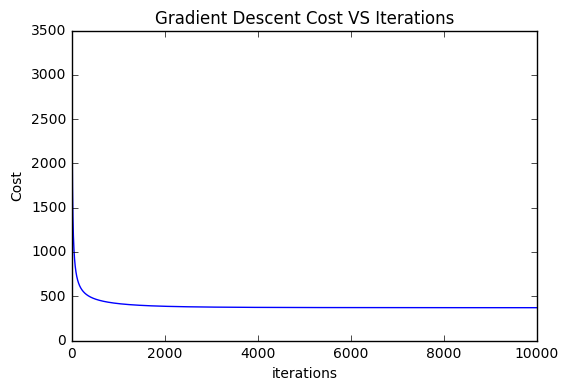

In [347]:
#GD
l1_optimal = 0.0001
cost1 = list(range(0))
for i in range(10000):
    s = 1/(1+np.exp(-training_full[:,0:12].dot(weight[i]))).reshape(k,1)
    gradient = 2*l1_optimal*weight[i].reshape(12,1) - np.dot(np.transpose(training_full[:,0:12]), training_full[:,12].reshape(k,1)-s)
    weight[i+1] = weight[i]-alpha*gradient.reshape(1,12)
    cost1.append(l1_optimal*(np.linalg.norm(weight[i+1])**2) - np.dot(training_full[:,12], np.log(s))-np.dot(1-training_full[:,12], np.log(1-s)))

#Plot for GD vs cost
iteration=np.arange(10000)
plt.plot(iteration,cost1)
plt.title("Gradient Descent Cost VS Iterations")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()

In [348]:
#SGD
alpha2 = 1
final_cost2 = list(range(0))
#Cross valiation to choose the best lambda for SGD
for l2 in l_range:
    cost2 = list(range(0))
    weight2 = np.zeros((15001,12))
    for i in range(15000):
        index = random.sample(range(4800),1)
        s = 1/(1+np.exp(-training_full[:,0:12].dot(weight2[i]))).reshape(k,1)
        gradient = 2*l2*weight2[i] - (training_full[index,12]-s[index])*(training_full[index,0:12])
        weight2[i+1] = weight2[i].reshape(1,12) - alpha2*gradient
        cost2.append(l2*(np.linalg.norm(weight2[i+1])**2) - np.dot(training_full[:,12], np.log(s))-np.dot(1-training_full[:,12], np.log(1-s)))
    final_cost2.append(cost2[14999])    
final_cost2

[array([ 2515.05592439]),
 array([ 3104.92331038]),
 array([ 3303.05192485]),
 array([ 3322.61725303]),
 array([ 19072.07899062])]

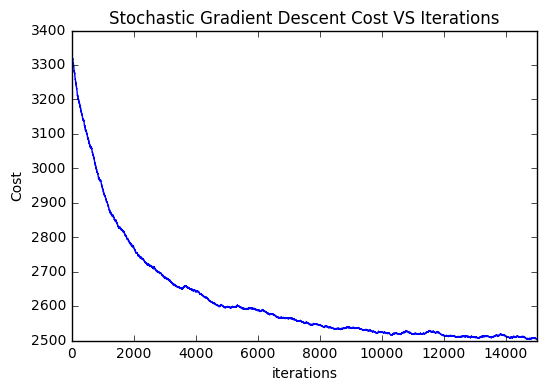

In [349]:
l2_optimal = 0.0001
cost2 = list(range(0))
weight2 = np.zeros((15001,12))
for i in range(15000):
    index = random.sample(range(4800),1)
    s = 1/(1+np.exp(-training_full[:,0:12].dot(weight2[i]))).reshape(k,1)
    gradient = 2*l2_optimal*weight2[i] - (training_full[index,12]-s[index])*(training_full[index,0:12])
    weight2[i+1] = weight2[i].reshape(1,12) - alpha2*gradient
    cost2.append(l2_optimal*(np.linalg.norm(weight2[i+1])**2) - np.dot(training_full[:,12], np.log(s)) - np.dot(1-training_full[:,12], np.log(1-s)))

#Plot for SGD vs cost
iteration=np.arange(15000)
plt.plot(iteration,cost2)
plt.title("Stochastic Gradient Descent Cost VS Iterations")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.xlim(0,15000)
plt.show()

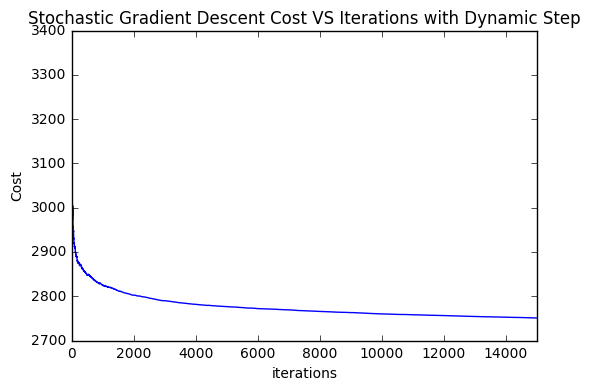

In [350]:
cost3 = list(range(0))
weight3 = np.zeros((15001,12))
for i in range(15000):
    index = random.sample(range(4800),1)
    s = 1/(1+np.exp(-training_full[:,0:12].dot(weight2[i]))).reshape(k,1)
    gradient = 2*l2_optimal*weight2[i]-(training_full[index,12]-s[index])*(training_full[index,0:12])
    weight2[i+1] = weight2[i].reshape(1,12)-200/(i+1)*gradient
    cost3.append(l2_optimal*(np.linalg.norm(weight2[i+1])**2) - np.dot(training_full[:,12],np.log(s)) - np.dot(1-training_full[:,12], np.log(1-s)))

#Plot for SGD cost with dynamic step 
iteration=np.arange(15000)
plt.plot(iteration,cost3)
plt.title("Stochastic Gradient Descent Cost VS Iterations with Dynamic Step")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.xlim(0,15000)
plt.show()

In [356]:
#Validation error
wine = np.zeros((1200,1))
for i in range(1200):
    wine[i]=sigmoid(float((validation_full[i,0:12].reshape(1,12)).dot(weight[9999].reshape(12,1))))
wine[wine<0.5] = 0
wine[wine>0.5] = 1
(wine!=validation_full[:,12].reshape(1200,1)).sum()/1200

0.022499999999999999

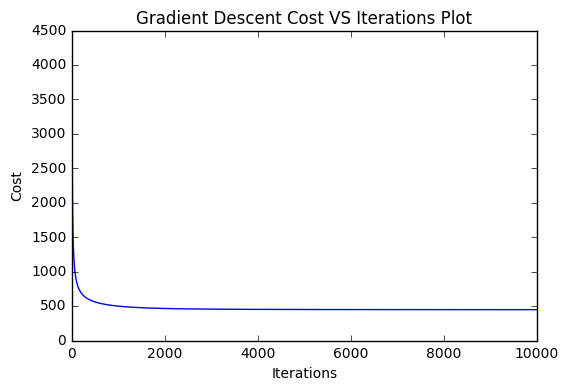

In [360]:
weight4 = np.zeros((10001,12))
cost4 = list(range(0))
for i in range(10000):
    s = 1/(1+np.exp(-data_full[:,0:12].dot(weight4[i]))).reshape(6000,1)
    gradient = 2*l1_optimal*weight4[i].reshape(12,1)-np.dot(np.transpose(data_full[:,0:12]), data_full[:,12].reshape(6000,1)-s)
    weight4[i+1] = weight4[i] - alpha*gradient.reshape(1,12)
    cost4.append((l1_optimal*(np.linalg.norm(weight4[i+1])**2) - np.dot(data_full[:,12],np.log(s)) - np.dot(1-data_full[:,12], np.log(1-s))))

#Plot for GD vs cost
iteration = np.arange(10000)
plt.plot(iteration,cost4)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Cost VS Iterations Plot")
plt.show()

In [344]:
#Save test result for Kaggle competition
result = np.empty((497,1))
for i in range(497):
    result[i] = sigmoid(float((test_data[i].reshape(1,12)).dot(weight4[10000].reshape(12,1))))
result[result<0.5] = 0
result[result>0.5] = 1
np.savetxt("test.csv",result)